# here is the logistic classification demo in this link
https://www.bilibili.com/video/av33101528/?p=5

- the logistic classification $J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}( y^{i}log(h_\theta (x^{(i)}))+(1-y^{i})(log(1-h_\theta (x^{(i)}))))$
and below is the gradient, 
     $J(\theta)_{\theta_j}=\frac{1}{m}[\sum_{i=1}^m(h_\theta(x^{i})-y^{(i)})x_j^{(i)}]$
the derive process can be found here https://www.cnblogs.com/zhongmiaozhimen/p/6155093.html 

<IPython.core.display.Javascript object>


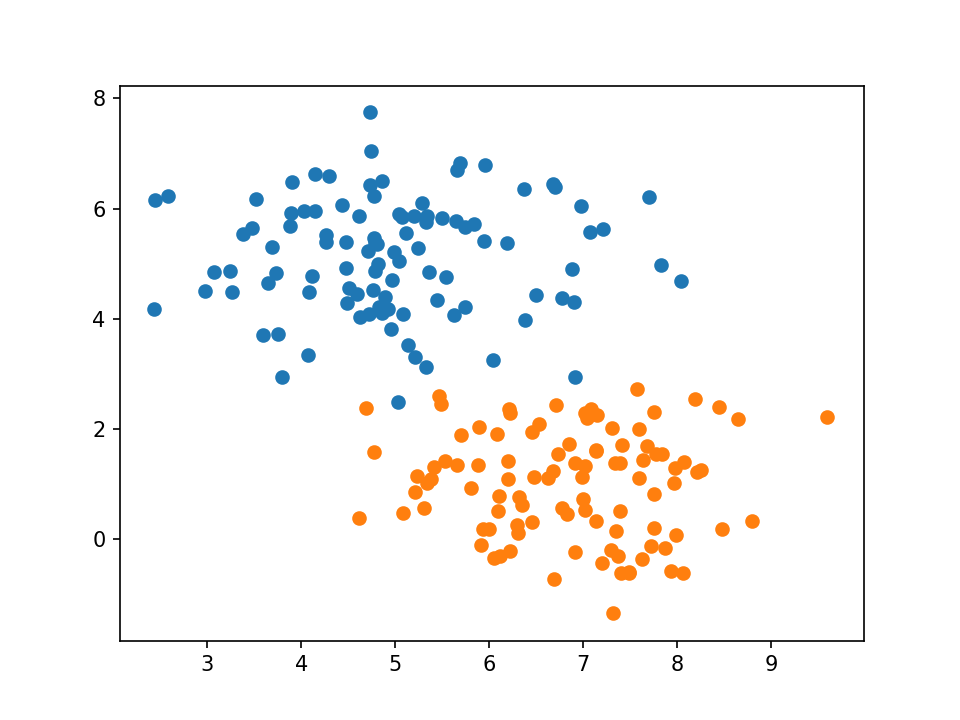

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
mean_1 = (5, 5)
cov_1 = [[1, 0], [0, 1]]
data_1=np.random.multivariate_normal(mean_1,cov_1,(100))
#print(data_1.shape)
plt.scatter(data_1[:,0],data_1[:,1])

mean_2= (7,1)
cov_2 = [[1, 0], [0, 1]]
data_2=np.random.multivariate_normal(mean_2,cov_2,(100))
plt.scatter(data_2[:,0],data_2[:,1])
plt.show()
ones_1=np.ones(np.shape(data_1)[0])
data_11=np.concatenate((data_1,ones_1[:,np.newaxis]),1)
ones_2=np.ones(np.shape(data_2)[0])
data_22=np.concatenate((data_2,ones_2[:,np.newaxis]),1)
tag=np.concatenate((1*ones_1,0*ones_2),0)
#print(data_1.shape)
data_total=np.concatenate((data_11,data_22),0)
data_total_nobias=np.concatenate((data_1,data_2),0)

<IPython.core.display.Javascript object>


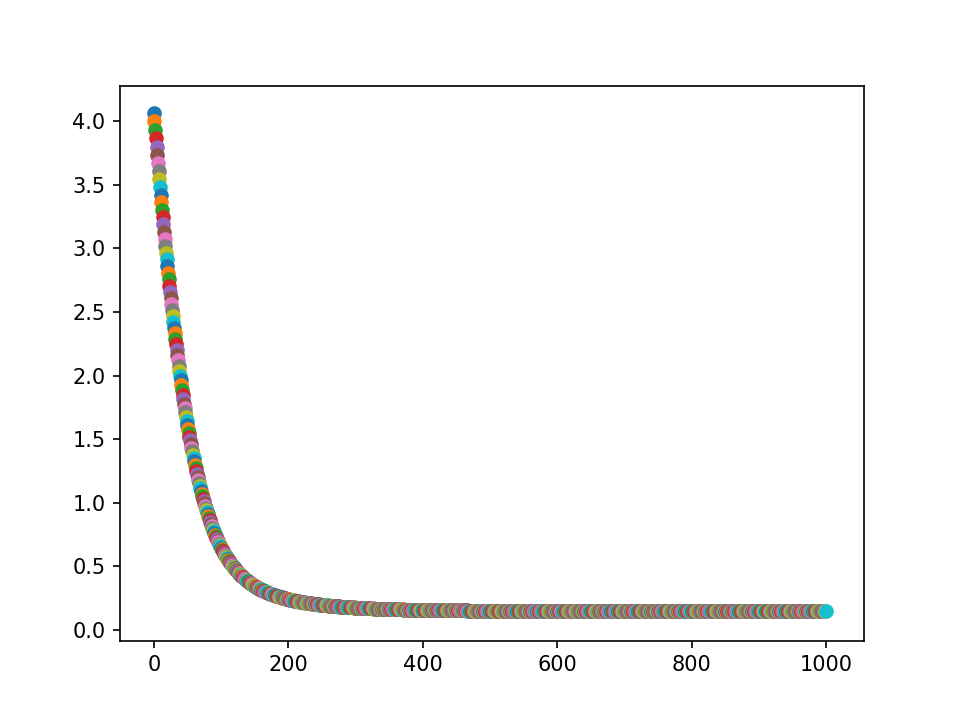

[-0.4495033   0.89297986 -0.017504  ]


In [85]:
w=np.array([1,-1,2])
plt.figure()
for i in range(1000):
    
    hz=1/(1+np.exp(-data_total@w))
    loss_total=-1/np.shape(data_total)[0]*np.sum(tag*np.log(hz)+(1-tag)*np.log(1-hz),0)
    plt.scatter(i,loss_total)
    #print(loss_total)
    d_w=-np.sum((hz-tag)[:,np.newaxis]*data_total,0)
    w=0.99*w+0.01*d_w/np.linalg.norm(d_w, ord=2)
plt.show()
print(w)



<IPython.core.display.Javascript object>


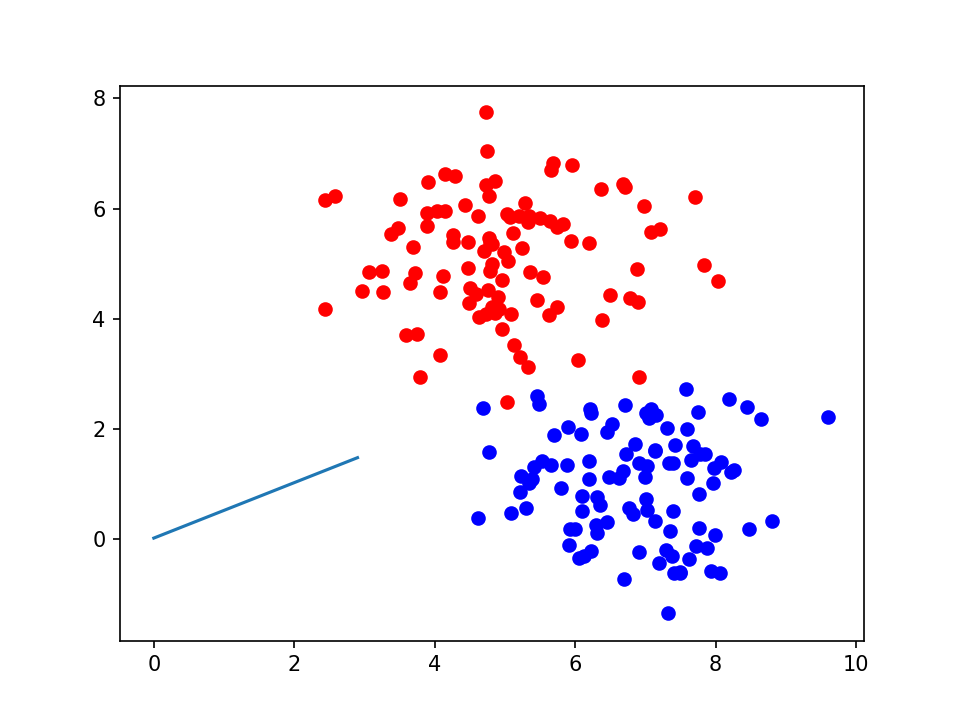

<IPython.core.display.Javascript object>


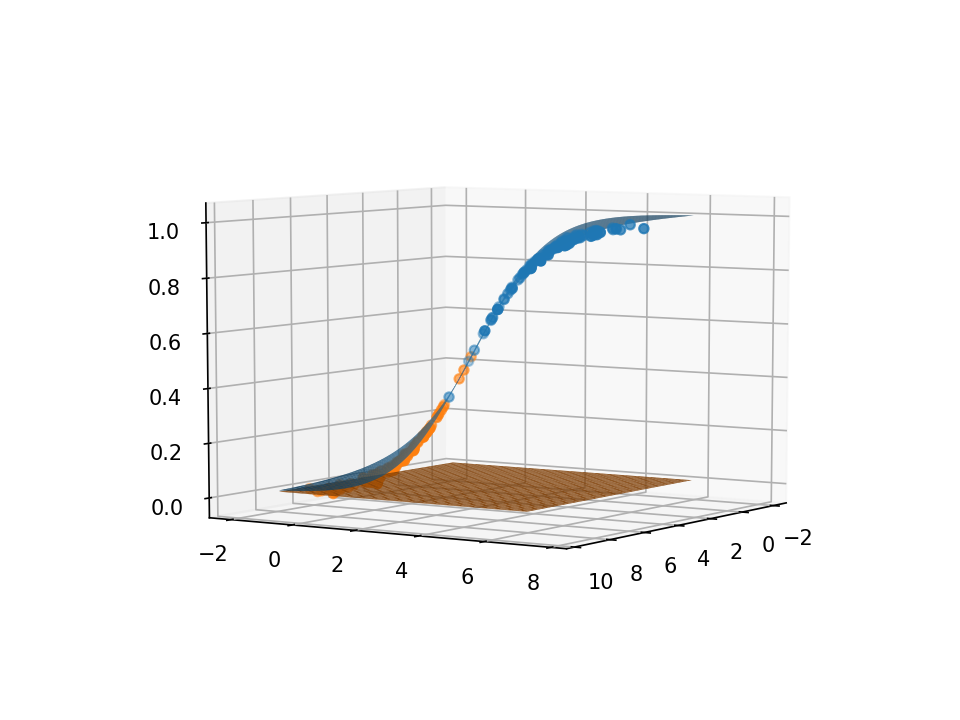

In [93]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()

plt.scatter(data_1[:,0],data_1[:,1],color='r')


plt.scatter(data_2[:,0],data_2[:,1],color='b')
line_x=np.arange(0,3,0.1)
line_y=-w[0]/w[1]*line_x-w[2]/w[1]
plt.plot(line_x,line_y)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')

z=1/(1+np.exp(-data_total@w))
ax.scatter(data_total[0:100,0],data_total[0:100,1],z[0:100])
ax.scatter(data_total[100:199,0],data_total[100:199,1],z[100:199])

surf_x=np.arange(-2,8,0.1)
surf_y=np.arange(-2,6,0.1)
xx,yy=np.meshgrid(surf_x,surf_y)

z=xx*w[0]+yy*w[1]+w[2]
z_data=1/(1+np.exp(-z))
ax.plot_surface(xx,yy,z_data)
ax.plot_surface(xx,yy,np.zeros(np.shape(xx)))
plt.show()

<IPython.core.display.Javascript object>


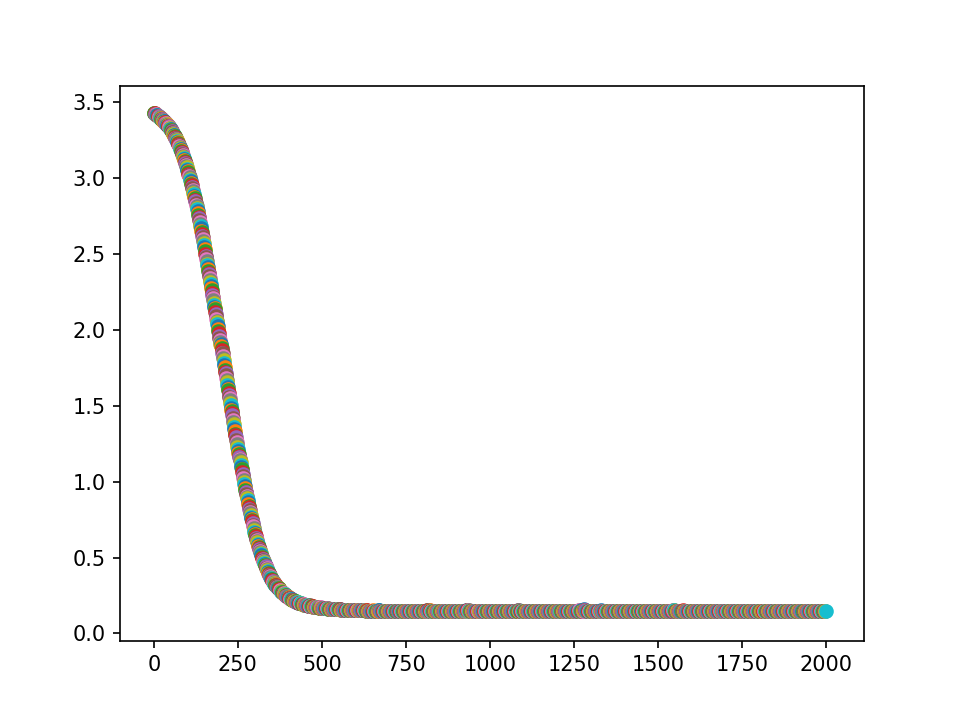

[-0.44834589  0.8937545  -0.01374257]


In [82]:
w=np.array([1,0,0])
plt.figure()
for i in range(2000):
    
    hz=1/(1+np.exp(-data_total@w))
    loss_total=-1/np.shape(data_total)[0]*np.sum(tag*np.log(hz)+(1-tag)*np.log(1-hz),0)
    plt.scatter(i,loss_total)
    #print(loss_total)
    ind=np.random.randint(0,np.shape(data_total)[0],10)
    d_w=-np.sum((hz-tag)[ind,np.newaxis]*data_total[ind,:],0)
    w=0.99*w+0.01*d_w/np.linalg.norm(d_w, ord=2)
    w=w/np.linalg.norm(w, ord=2)
plt.show()
print(w)



## I just found that it can't descend very well.

<IPython.core.display.Javascript object>


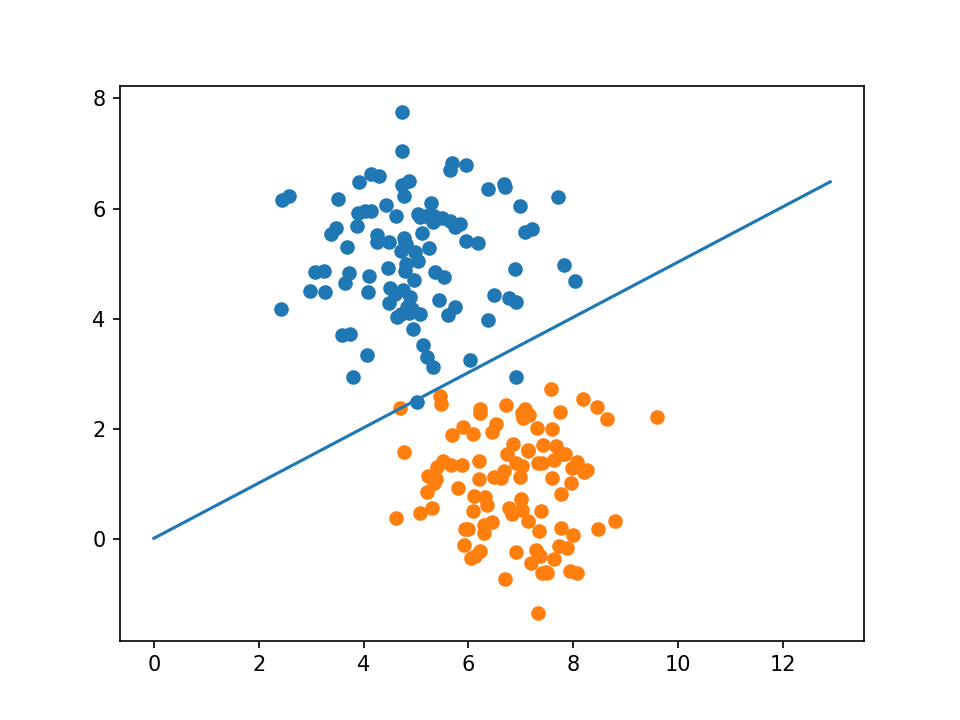

<IPython.core.display.Javascript object>


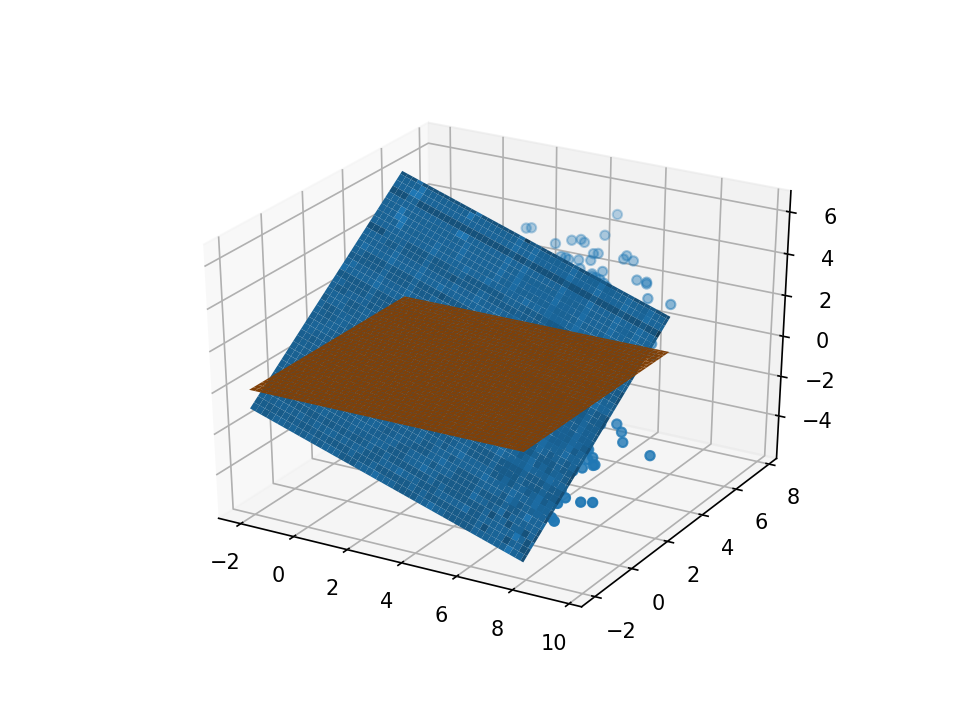

In [83]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()

plt.scatter(data_1[:,0],data_1[:,1])


plt.scatter(data_2[:,0],data_2[:,1])
line_x=np.arange(0,13,0.1)
line_y=-w[0]/w[1]*line_x-w[2]/w[1]
plt.plot(line_x,line_y)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')

z=data_total@w
ax.scatter(data_total[:,0],data_total[:,1],z)

surf_x=np.arange(-2,8,0.1)
surf_y=np.arange(-2,6,0.1)
xx,yy=np.meshgrid(surf_x,surf_y)

z=xx*w[0]+yy*w[1]+w[2]
ax.plot_surface(xx,yy,z)
ax.plot_surface(xx,yy,np.zeros(np.shape(xx)))
plt.show()